# Project: Finding Donors for *CharityML*

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt


# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")
data.head(n=5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## 1. Data Exploration

In [3]:
n_records = len(data)
n_greater_50k = len(data.loc[data['income']=='>50K'])
n_at_most_50k = len(data.loc[data['income']=='<=50K'])
greater_percent =n_greater_50k/n_records*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.shape

(45222, 14)

## 2. Data Preprocess


### 2.1 Remove Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce41240>,
      dtype=object)

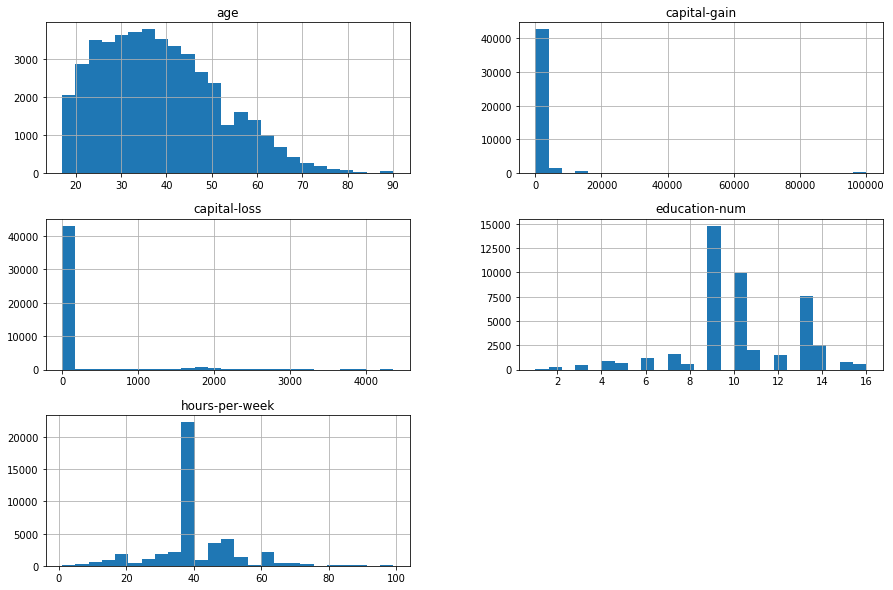

In [27]:
data.hist(bins=25,figsize=(15,10))

In [25]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd15c50>,
      dtype=object)

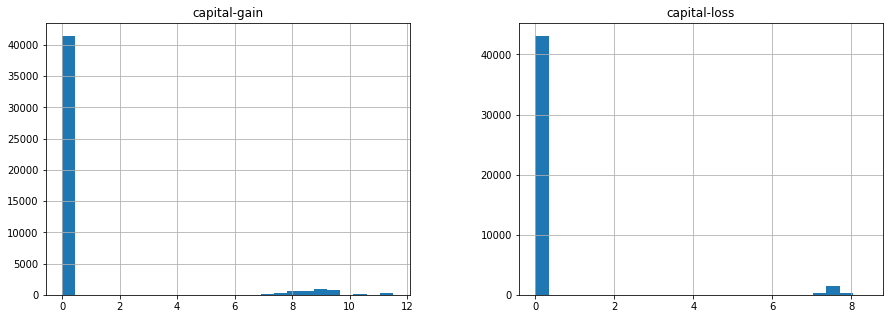

In [26]:
# remove skewness for 'capital-gain' and 'capital-loss'
skewed_cols = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed_cols] = features_raw[skewed_cols].apply(lambda x: np.log(x + 1))
features_log_transformed[skewed_cols].hist(bins=25,figsize=(15,5))

### 2.2 Normalizing Numerical Data

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical_cols] = scaler.fit_transform(features_log_minmax_transform[numerical_cols])

features_log_minmax_transform.head(n = 5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### 2.3 Convert Categorical Data into Dummy Variables

In [31]:
features_final = pd.get_dummies(features_log_minmax_transform)
income = income_raw.map({"<=50K":0,">50K":1})
features_final.shape

(45222, 103)

### 2.4 Shuffle and Split Data

In [32]:
from sklearn.cross_validation import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 3. Algorithm Application

### 3.1 Model Selection

In [37]:
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    ouputs:
       dictionary contains performance results
    '''
    
    results = {}
    # fit the model on train set
    start = time() # Get start time
    learner = learner
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end -start
        
    #  Get the predictions on the test set(X_test),
    #  then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize the three models
clf_A = LogisticRegression(random_state=0)
clf_B = SVC(random_state=0)
clf_C = GradientBoostingClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = int(n_records)
samples_10 = int(n_records*0.1)
samples_1 = int(n_records*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 452 samples.
LogisticRegression trained on 4522 samples.
LogisticRegression trained on 45222 samples.


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 452 samples.
SVC trained on 4522 samples.
SVC trained on 45222 samples.
GradientBoostingClassifier trained on 452 samples.
GradientBoostingClassifier trained on 4522 samples.
GradientBoostingClassifier trained on 45222 samples.


Text(0.5,0.98,'Performance Results for Candidate Models')

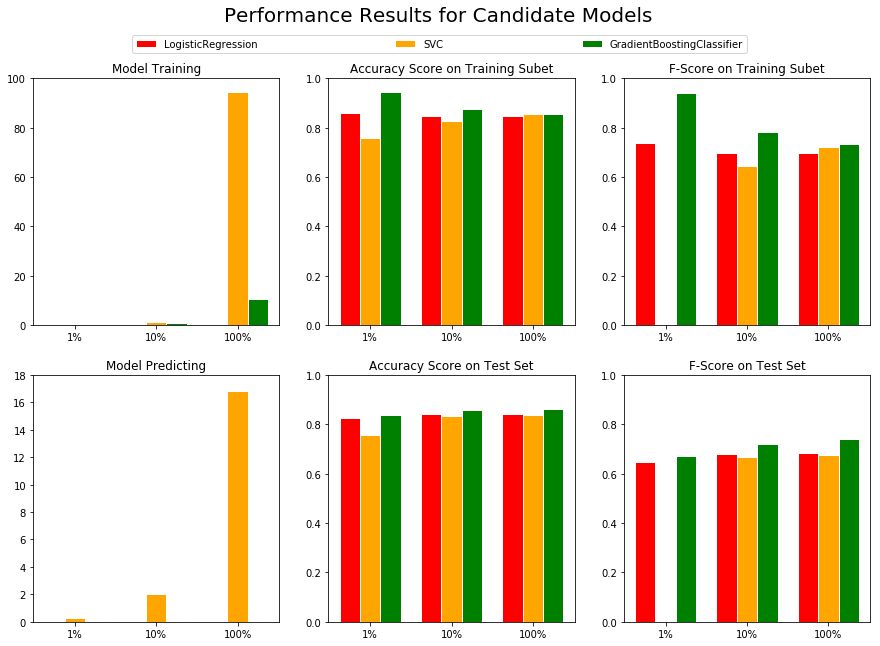

In [105]:
models=['LogisticRegression', 'SVC', 'GradientBoostingClassifier']
sample_index=[0,1,2]
lr_train_time=[results['LogisticRegression'][ind]['train_time'] for ind in sample_index]
lr_pred_time=[results['LogisticRegression'][ind]['pred_time'] for ind in sample_index]
lr_acc_train=[results['LogisticRegression'][ind]['acc_train'] for ind in sample_index]
lr_acc_test=[results['LogisticRegression'][ind]['acc_test'] for ind in sample_index]
lr_f_train=[results['LogisticRegression'][ind]['f_train'] for ind in sample_index]
lr_f_test=[results['LogisticRegression'][ind]['f_test'] for ind in sample_index]

svc_train_time=[results['SVC'][ind]['train_time'] for ind in sample_index]
svc_pred_time=[results['SVC'][ind]['pred_time'] for ind in sample_index]
svc_acc_train=[results['SVC'][ind]['acc_train'] for ind in sample_index]
svc_acc_test=[results['SVC'][ind]['acc_test'] for ind in sample_index]
svc_f_train=[results['SVC'][ind]['f_train'] for ind in sample_index]
svc_f_test=[results['SVC'][ind]['f_test'] for ind in sample_index]

gbc_train_time=[results['GradientBoostingClassifier'][ind]['train_time'] for ind in sample_index]
gbc_pred_time=[results['GradientBoostingClassifier'][ind]['pred_time'] for ind in sample_index]
gbc_acc_train=[results['GradientBoostingClassifier'][ind]['acc_train'] for ind in sample_index]
gbc_acc_test=[results['GradientBoostingClassifier'][ind]['acc_test'] for ind in sample_index]
gbc_f_train=[results['GradientBoostingClassifier'][ind]['f_train'] for ind in sample_index]
gbc_f_test=[results['GradientBoostingClassifier'][ind]['f_test'] for ind in sample_index]



fig=plt.figure(figsize=(15, 10))
barWidth = 0.25
# Set position of bar on X axis
r1 = sample_index
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.subplot(2,3,1)
plt.bar(r1, lr_train_time, color='red', width=barWidth, edgecolor='white', label='LogisticRegression')
plt.bar(r2, svc_train_time, color='orange', width=barWidth, edgecolor='white', label='SVC')
plt.bar(r3, gbc_train_time, color='green', width=barWidth, edgecolor='white', label='GradientBoostingClassifier')
plt.ylim([0,100])
plt.title('Model Training')
plt.xticks([0.25,1.25,2.25],['1%','10%','100%'])

plt.subplot(2,3,4)
plt.bar(r1, lr_pred_time, color='red', width=barWidth, edgecolor='white', label='LogisticRegression')
plt.bar(r2, svc_pred_time, color='orange', width=barWidth, edgecolor='white', label='SVC')
plt.bar(r3, gbc_pred_time, color='green', width=barWidth, edgecolor='white', label='GradientBoostingClassifier')
plt.ylim([0,18])
plt.title('Model Predicting')
plt.xticks([0.25,1.25,2.25],['1%','10%','100%'])

plt.subplot(2,3,2)
plt.bar(r1, lr_acc_train, color='red', width=barWidth, edgecolor='white', label='LogisticRegression')
plt.bar(r2, svc_acc_train, color='orange', width=barWidth, edgecolor='white', label='SVC')
plt.bar(r3, gbc_acc_train, color='green', width=barWidth, edgecolor='white', label='GradientBoostingClassifier')
plt.ylim([0,1])
plt.title('Accuracy Score on Training Subet')
plt.xticks([0.25,1.25,2.25],['1%','10%','100%'])

plt.subplot(2,3,5)
plt.bar(r1, lr_acc_test, color='red', width=barWidth, edgecolor='white', label='LogisticRegression')
plt.bar(r2, svc_acc_test, color='orange', width=barWidth, edgecolor='white', label='SVC')
plt.bar(r3, gbc_acc_test, color='green', width=barWidth, edgecolor='white', label='GradientBoostingClassifier')
plt.ylim([0,1])
plt.title('Accuracy Score on Test Set')
plt.xticks([0.25,1.25,2.25],['1%','10%','100%'])

plt.subplot(2,3,3)
plt.bar(r1, lr_f_train, color='red', width=barWidth, edgecolor='white', label='LogisticRegression')
plt.bar(r2, svc_f_train, color='orange', width=barWidth, edgecolor='white', label='SVC')
plt.bar(r3, gbc_f_train, color='green', width=barWidth, edgecolor='white', label='GradientBoostingClassifier')
plt.ylim([0,1])
plt.title('F-Score on Training Subet')
plt.xticks([0.25,1.25,2.25],['1%','10%','100%'])

plt.subplot(2,3,6)
plt.bar(r1, lr_f_test, color='red', width=barWidth, edgecolor='white', label='LogisticRegression')
plt.bar(r2, svc_f_test, color='orange', width=barWidth, edgecolor='white', label='SVC')
plt.bar(r3, gbc_f_test, color='green', width=barWidth, edgecolor='white', label='GradientBoostingClassifier')
plt.ylim([0,1])
plt.title('F-Score on Test Set')
plt.xticks([0.25,1.25,2.25],['1%','10%','100%'])

plt.legend(bbox_to_anchor=(-2.0, 2.3, 2.5, .20), loc=3,ncol=3, mode="expand", borderaxespad=0.)

fig.suptitle('Performance Results for Candidate Models',fontsize=20)


### 3.2 Model Tunning

In [106]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


clf = GradientBoostingClassifier(random_state=0)
parameters = { 'learning_rate':[0.05,0.1,0.15],
              'min_samples_split':[5,10],
              'max_depth':[3,4]}
scorer = make_scorer(fbeta_score,beta=0.5)
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8681
Final F-score on the testing data: 0.7463


## 4. Insights Generation

In [136]:
feature_importance=best_clf.feature_importances_
top5_index=np.argsort(feature_importance)[:-6:-1]
top5_features=X_train.columns[top5_index]
top5_feature_importance=feature_importance[top5_index]

([<matplotlib.axis.XTick at 0x1a32373a90>,
 <a list of 5 Text xticklabel objects>)

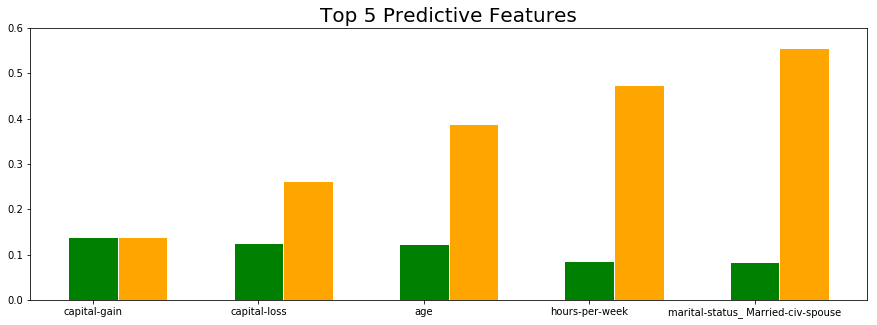

In [179]:
fig=plt.figure(figsize=(15, 5))
barWidth = 0.3
# Set position of bar on X axis
r1 = range(1,6)
r2 = [x + barWidth for x in r1]

plt.subplot(1,1,1)
plt.bar(r1,top5_feature_importance, color='green', width=barWidth, edgecolor='white', label='Feature Importance')
plt.bar(r2,np.cumsum(top5_feature_importance), color='orange', width=barWidth, edgecolor='white', label='Cumulative Feature Importance')
plt.ylim([0,0.6])
plt.title('Top 5 Predictive Features',fontsize=20)
plt.xticks(r1,top5_features)